https://www.kaggle.com/uciml/mushroom-classification/notebooks

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from pylab import subplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Exploring data analysis

## Load data

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
print(df.shape)
df.head(2)

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


Attribute Information: (classes: edible=e, poisonous=p)
 * cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
 * cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
 * cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
 * bruises: bruises=t,no=f
 * odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
 * gill-attachment: attached=a,descending=d,free=f,notched=n
 * gill-spacing: close=c,crowded=w,distant=d
 * gill-size: broad=b,narrow=n 
 * gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
 * stalk-shape: enlarging=e,tapering=t
 * stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
 * stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
 * stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
 * stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 * stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 * veil-type: partial=p,universal=u
 * veil-color: brown=n,orange=o,white=w,yellow=y
 * ring-number: none=n,one=o,two=t
 * ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
 * spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
 * population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
 * habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Total inspection

<i>There is clearly all categorical features. Let's check out their behavior

In [5]:
print('Total count of nans: ', df.isnull().sum().sum())

Total count of nans:  0


In [6]:
ser = df.apply(lambda x: dict(x.value_counts(normalize = True).apply(lambda x: round(x, 3))))

print('Amount of distinct values in features:', df.apply(lambda x: x.nunique()))

Amount of distinct values in features: class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


## Features analysis

<i>There is maybe occur useless attributes. We looking for features with very low variance

In [7]:
for x in ser:
    if pd.Series(x)[pd.Series(x) > 0.99].any():
        print(ser[ser == x])

veil-type    {'p': 1.0}
dtype: object


<i>That attribute will useless for models

In [8]:
df.drop('veil-type', axis = 1, inplace = True)

<i>Let's check the correlation of each attribute with the target

In [9]:
ser = pd.Series([])
n = df.shape[0]
for col in df.columns[1:]:
    cros = pd.crosstab(df['class'], df[col])
    stat, p_val, a, b = chi2_contingency(cros)
    ser[col] = np.sqrt(stat/n)    

In [78]:
ser.sort_values(ascending = False)

odor                        0.971005
spore-print-color           0.752645
gill-color                  0.680830
ring-type                   0.603271
stalk-surface-above-ring    0.587944
stalk-surface-below-ring    0.574837
gill-size                   0.539758
stalk-color-above-ring      0.524850
stalk-color-below-ring      0.514725
bruises                     0.501280
population                  0.487376
habitat                     0.440136
stalk-root                  0.406805
gill-spacing                0.348052
cap-shape                   0.245571
cap-color                   0.218427
ring-number                 0.214772
cap-surface                 0.196925
veil-color                  0.153421
gill-attachment             0.128424
stalk-shape                 0.101770
dtype: float64

<i>Let's see on distribution of all attributes in target classes
Пронаблюдаем как ведут себя распределения признаков

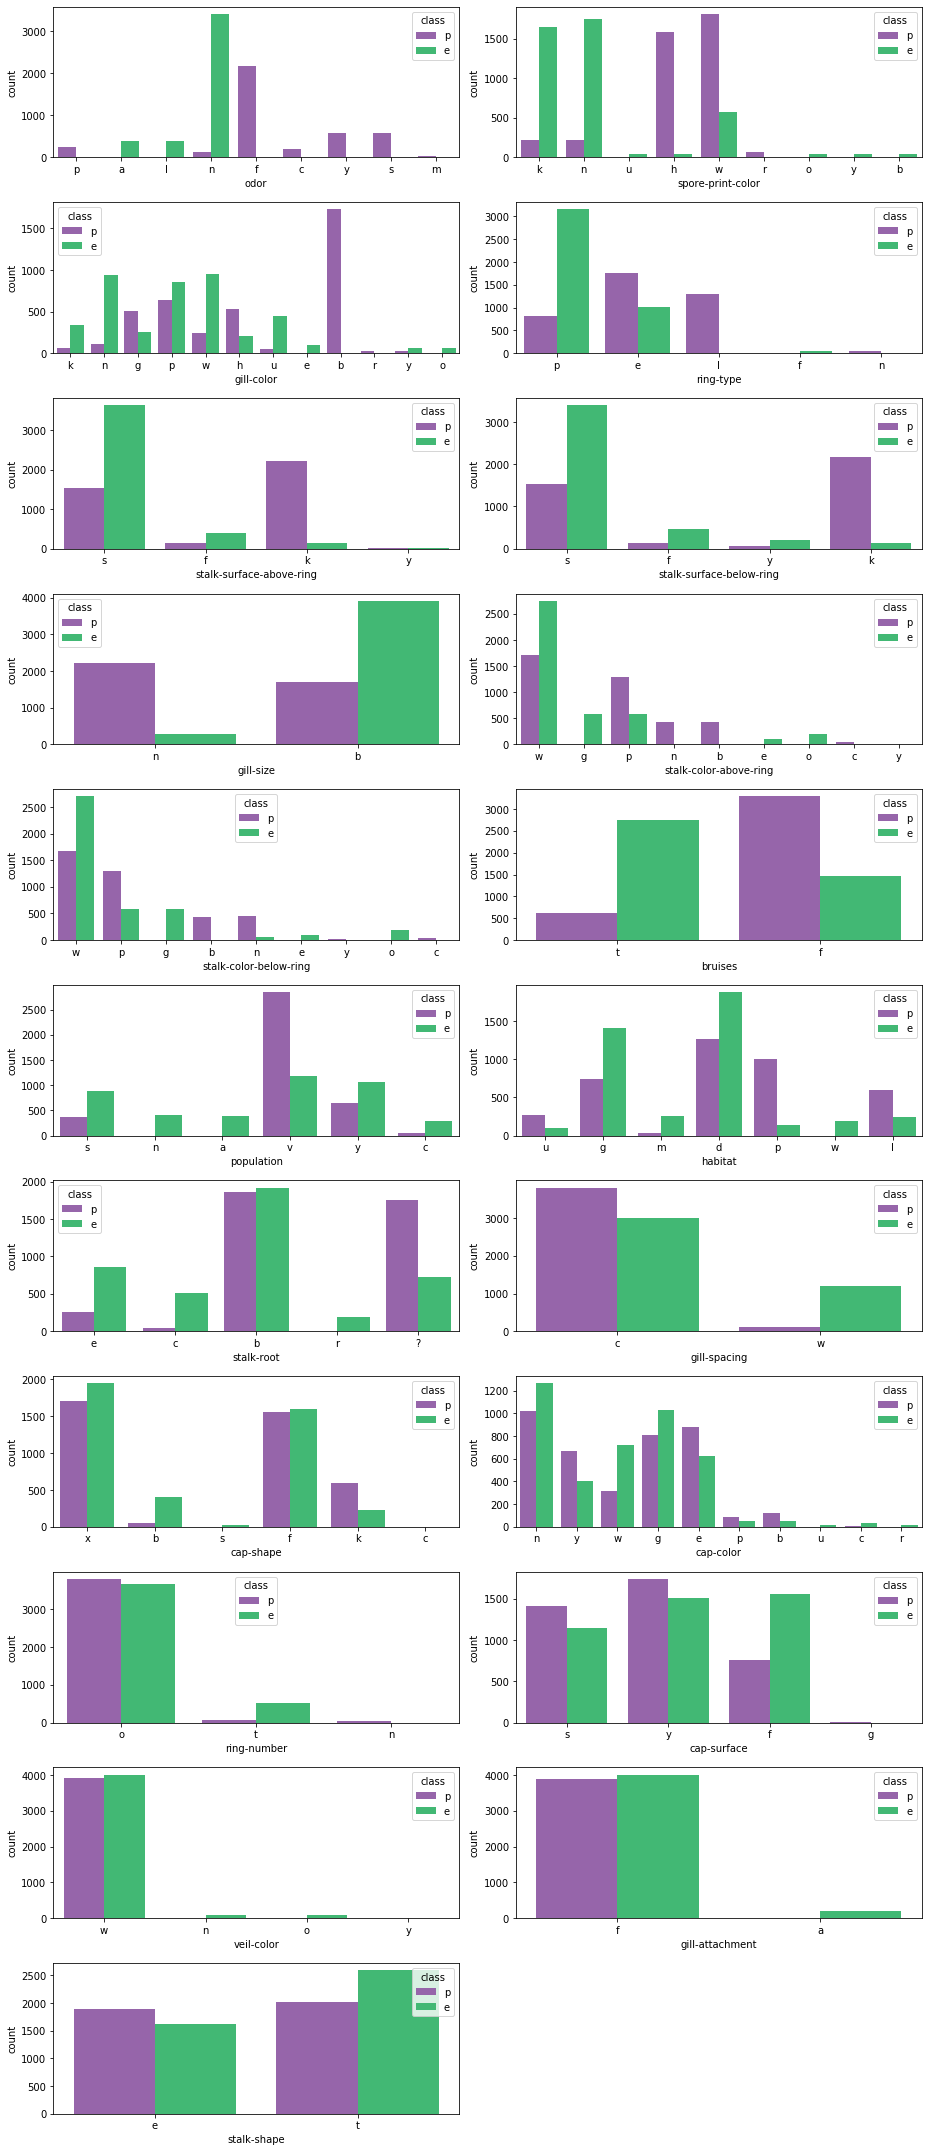

In [11]:
plt.figure(figsize = (13, 35))
i = 1
flatui = ["#9b59b6", "#2ecc71"]
sns.set_palette(flatui)
for col in ser.sort_values(ascending = False).index:
    subplot(13, 2, i)
    sns.countplot(df[col], hue = df['class'])
    i = i+1
plt.tight_layout()

В некоторых признаках есть значения принадлежащие только к одному классу, уже по ним можно определять ядовитость грибов(например odor, spore-print-color и тд). Такие признаки будут самыми важными в нашей модели. Судя по признаку odor, только по запаху гриба уже можно точно определить сьедобность гриба(что подтверждает очень высокая корреляция). Только в случае отсутствия запаха необходимо уже ориентироватся на другие признаки. Ядовитых грибов без запаха очень мало, так что ошибок первого рода здесь допускать нельзя. Рассмотрим признаки грибов неимеющих запаха. 

In some traits there are values belonging to only one class, that way it is possible to determine the toxicity of mushrooms (for example: odor, spore-print-color, etc.). These features will be the most important in our model. Due mushrooms odor we can know that poisonous or edible mushrooms(this is confirmed by a very high correlation).
Only in the absence of smell it's necessary to focus on other features. There are very few odorless poisonous mushrooms, so mistakes of the first kind should not be allowed here. Let's check the signs of odorless mushrooms.

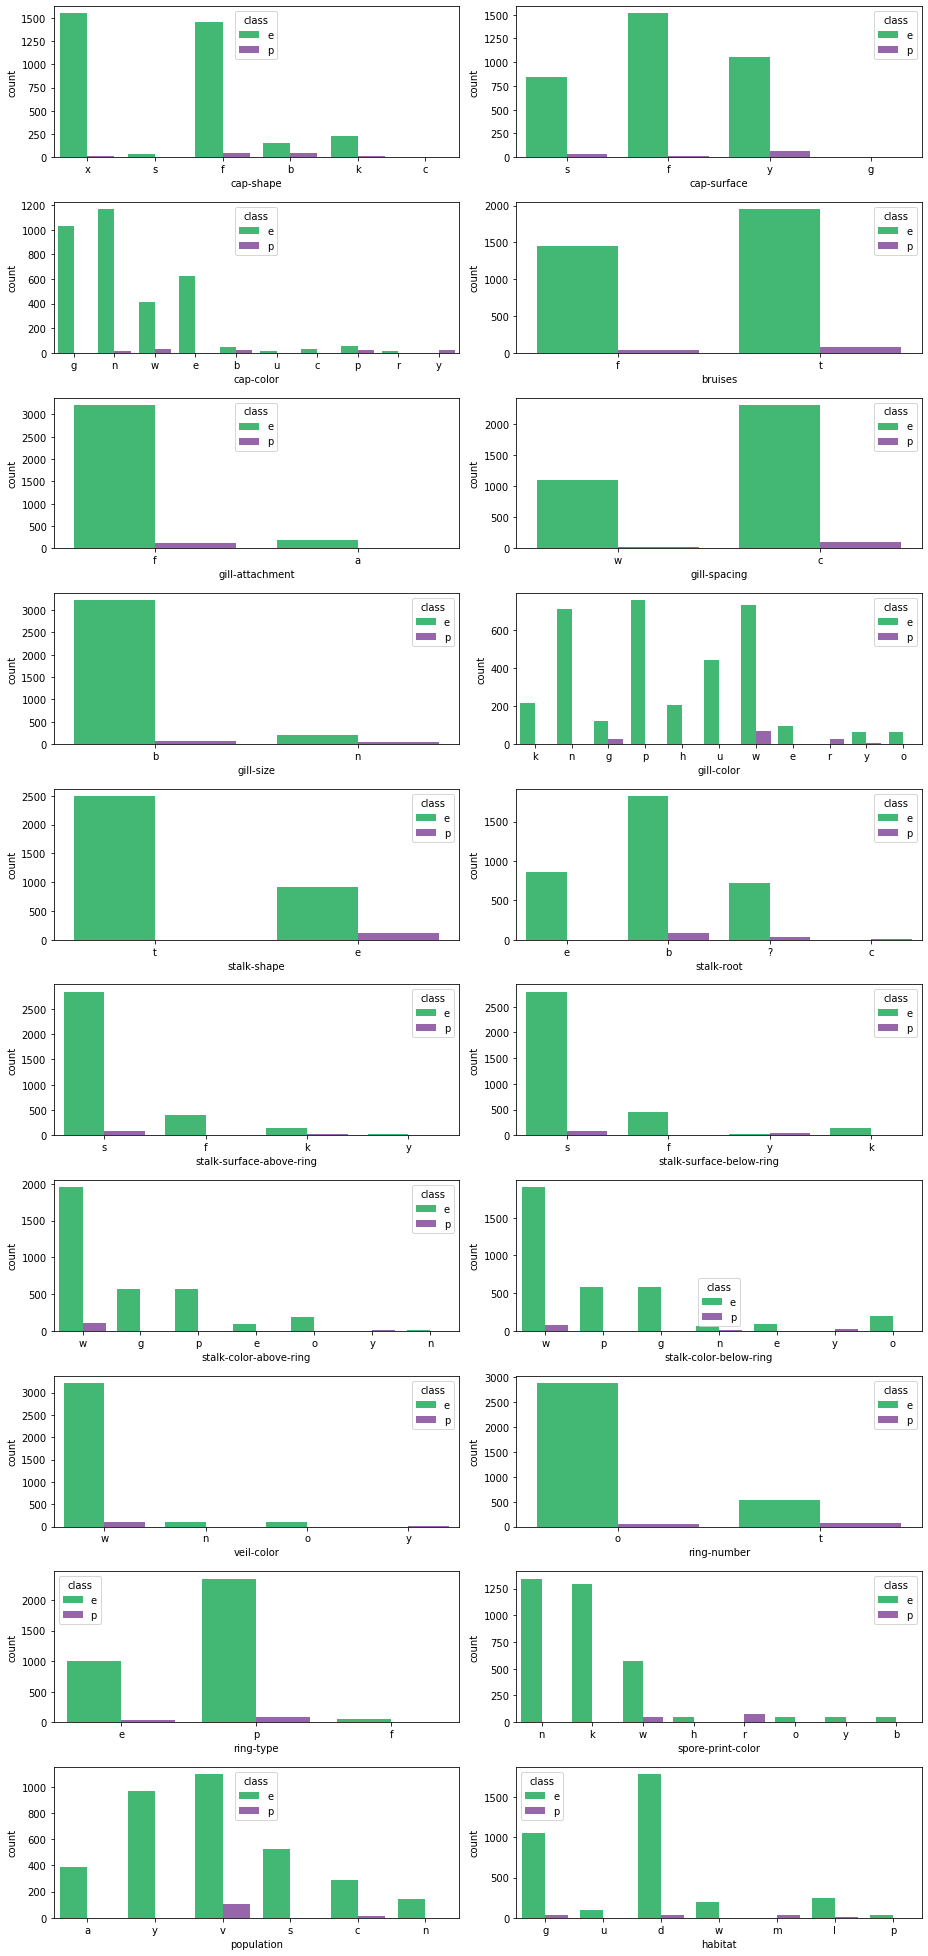

In [12]:
df_none_odor = df[df.odor == 'n']
df_none_odor.drop('odor', axis = 1, inplace = True)
flatui = ["#2ecc71", "#9b59b6"]
sns.set_palette(flatui)
plt.figure(figsize = (13, 35))
i = 1
for col in df_none_odor.columns[1:]:
    subplot(13, 2, i)
    sns.countplot(df_none_odor[col], hue = df_none_odor['class'])
    i = i+1
plt.tight_layout()

We can observe again that same values of features can belong to only one class. Note: target classes proportion in this data aren't balanced 
И опять мы можем заметить значения у признаков, принадлежащие только одному классу. Стоит отметить, что классы в этих данных крайне не сбалансированны.

# Modeling

In [13]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [14]:
y = df['class'].map({'p': 1, 'e': 0})
X = df.drop('class', axis = 1)
X = pd.DataFrame(OrdinalEncoder().fit_transform(X))
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 0)

Testing models:
* Logistic regression
* Random Forest Classifier
* XGBoost Classifier
* Support Vector Classifier

## Logistic regression

In [15]:
# baseline
log = LogisticRegression()
scores = {'f1': make_scorer(f1_score), 'accure': make_scorer(accuracy_score), 'roc_auc': make_scorer(roc_auc_score)}
cross_scores = cross_validate(log, train_X, train_y, cv = 10, scoring = scores, n_jobs = -1)

In [16]:
print('F1-score = ', round(cross_scores['test_f1'].mean(), 5))
print('Accuracy-score = ', round(cross_scores['test_accure'].mean(), 5))
print('Roc-auc-score = ', round(cross_scores['test_roc_auc'].mean(), 5))

F1-score =  0.94788
Accuracy-score =  0.94994
Roc-auc-score =  0.94968


In [17]:
log.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
probabs = log.predict_proba(test_X)[:, 1]
y_pred_default = np.where(probabs > 0.5, 1, 0)

In [19]:
# upgrade
params = {'C': [100, 10, 1, 0.1, 0.01], 'max_iter': [10**6, 10**4, 100]}
grid_search = GridSearchCV(log, params, cv = 10, scoring = make_scorer(f1_score), n_jobs = -1)

In [20]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [1000000, 10000, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

In [21]:
log_up = grid_search.best_estimator_
grid_search.best_params_

{'C': 100, 'max_iter': 1000000}

In [22]:
probabs = log_up.predict_proba(test_X)[:, 1]
y_pred_upgrade_log = np.where(probabs > 0.5, 1, 0)

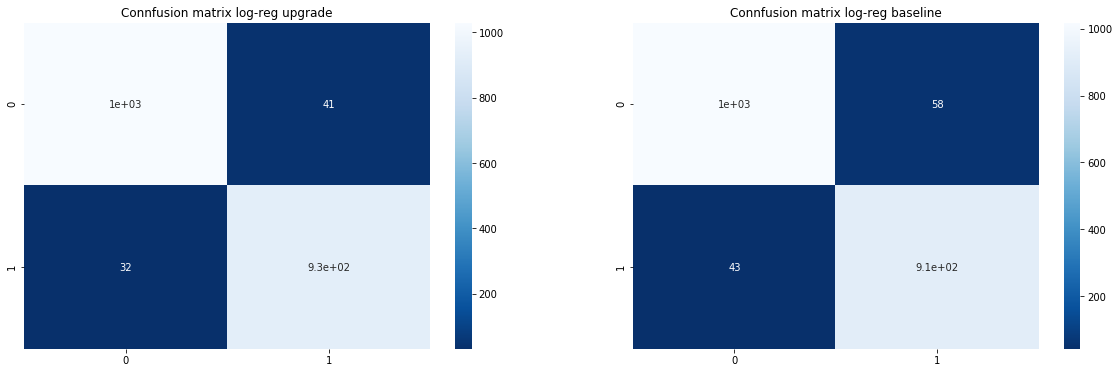

In [23]:
plt.figure(figsize = (20, 6))
subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_pred_upgrade_log, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix log-reg upgrade')

subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_pred_default, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix log-reg baseline')

plt.show()
# 1 - poisonous, 0 - edible

## Support vector classification

In [24]:
# baseline
sup_vec = SVC()
scores = {'f1': make_scorer(f1_score), 'accure': make_scorer(accuracy_score), 'roc_auc': make_scorer(roc_auc_score)}
cross_scores = cross_validate(sup_vec, train_X, train_y, cv = 10, scoring = scores, n_jobs = -1)

print('F1-score = ', round(cross_scores['test_f1'].mean(), 5))
print('Accuracy-score = ', round(cross_scores['test_accure'].mean(), 5))
print('Roc-auc-score = ', round(cross_scores['test_roc_auc'].mean(), 5))

F1-score =  0.98834
Accuracy-score =  0.98884
Roc-auc-score =  0.98852


In [25]:
sup_vec.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_pred_default = sup_vec.predict(test_X)

In [27]:
# upgrade
params = {'C': [10000, 1000, 100, 10, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(sup_vec, params, cv = 10, scoring = make_scorer(f1_score), n_jobs = -1)
#  ОБОСНОВАТЬ ПОЧЕМУ ВЫБИРАЛ ИЗ ТАКИХ ЯДЕР (ВЫСОКАЯ ЛИНЕЙНАЯ КОРРЕЛЯЦИЯ)

In [28]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10000, 1000, 100, 10, 1],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

In [29]:
sup_vec_up = grid_search.best_estimator_
y_pred_upgrade_svm = sup_vec_up.predict(test_X)
grid_search.best_params_

{'C': 10000, 'gamma': 0.1}

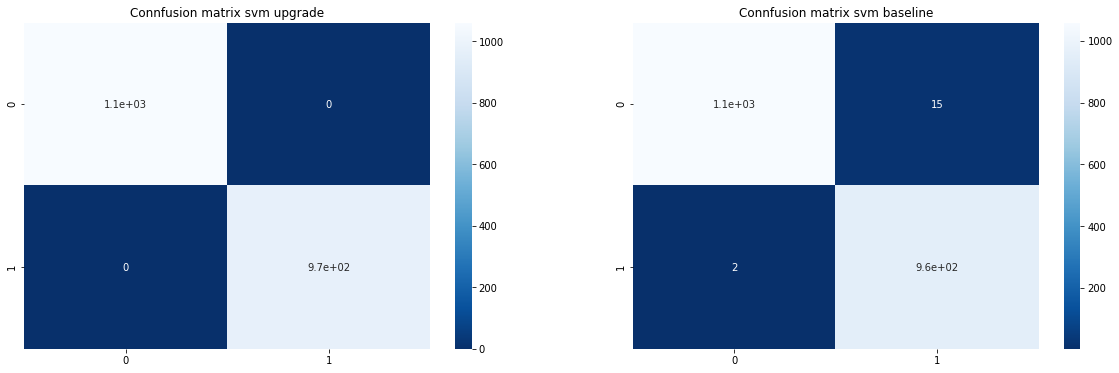

In [30]:
plt.figure(figsize = (20, 6))
subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_pred_upgrade_svm, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix svm upgrade')

subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_pred_default, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix svm baseline')

plt.show()
# 1 - poisonous, 0 - edible

## Random forest 

In [31]:
# baseline
rand_forest = RandomForestClassifier()
scores = {'f1': make_scorer(f1_score), 'accure': make_scorer(accuracy_score), 'roc_auc': make_scorer(roc_auc_score)}
cross_scores = cross_validate(rand_forest, train_X, train_y, cv = 10, scoring = scores, n_jobs = -1)

print('F1-score = ', round(cross_scores['test_f1'].mean(), 5))
print('Accuracy-score = ', round(cross_scores['test_accure'].mean(), 5))
print('Roc-auc-score = ', round(cross_scores['test_roc_auc'].mean(), 5))

F1-score =  1.0
Accuracy-score =  1.0
Roc-auc-score =  1.0


In [32]:
rand_forest.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred_default = rand_forest.predict(test_X)

In [34]:
# upgrade
params = {'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [n**2 for n in range(2, 9)],
          'n_estimators': [10, 30, 50, 70, 100]}
grid_search = GridSearchCV(rand_forest, params, cv = 10, scoring = make_scorer(f1_score), n_jobs = -1)

In [35]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [36]:
rand_forest_up = grid_search.best_estimator_
y_pred_upgrade_for = rand_forest_up.predict(test_X)
grid_search.best_params_

{'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 10}

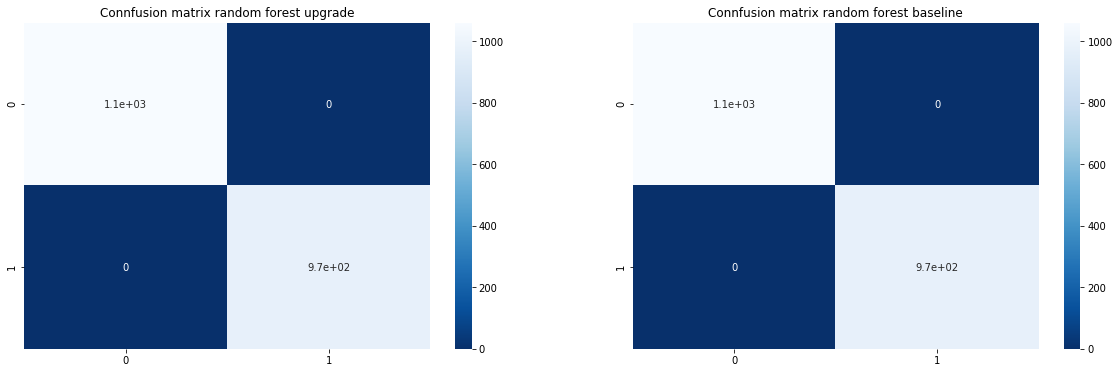

In [37]:
plt.figure(figsize = (20, 6))
subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_pred_upgrade_for, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix random forest upgrade')

subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_pred_default, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix random forest baseline')

plt.show()
# 1 - poisonous, 0 - edible

## XGBoost Classifier

In [38]:
#baseline
xgb_cls = XGBClassifier()
scores = {'f1': make_scorer(f1_score), 'accure': make_scorer(accuracy_score), 'roc_auc': make_scorer(roc_auc_score)}
cross_scores = cross_validate(xgb_cls, train_X, train_y, cv = 10, scoring = scores, n_jobs = -1)

print('F1-score = ', round(cross_scores['test_f1'].mean(), 5))
print('Accuracy-score = ', round(cross_scores['test_accure'].mean(), 5))
print('Roc-auc-score = ', round(cross_scores['test_roc_auc'].mean(), 5))

F1-score =  1.0
Accuracy-score =  1.0
Roc-auc-score =  1.0


In [39]:
xgb_cls.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
y_pred_default = xgb_cls.predict(test_X)

In [41]:
# upgrade
params = {'max_features': ['auto', 'sqrt', 'log2'], 'gamma': [0.5, 0.3, 0.1, 0.05, 0.01], 'eta':[1, 0.5, 0.1, 0.01],
          'n_estimators': [10, 30, 50, 70, 100], 'booster': ['gbtree', 'gblinear'], 'lambda': [0, 0.5, 1], 'alpha': [0, 0.5, 1]}
grid_search = RandomizedSearchCV(xgb_cls, params, cv = 10, scoring = make_scorer(f1_score), n_jobs = -1)

In [42]:
grid_search.fit(train_X, train_y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.5, 1],
                                        'booster': ['gbt

In [43]:
xgb_cls_up = grid_search.best_estimator_
y_pred_upgrade_xgb = rand_forest_up.predict(test_X)
grid_search.best_params_

{'n_estimators': 100,
 'max_features': 'log2',
 'lambda': 1,
 'gamma': 0.5,
 'eta': 1,
 'booster': 'gbtree',
 'alpha': 0}

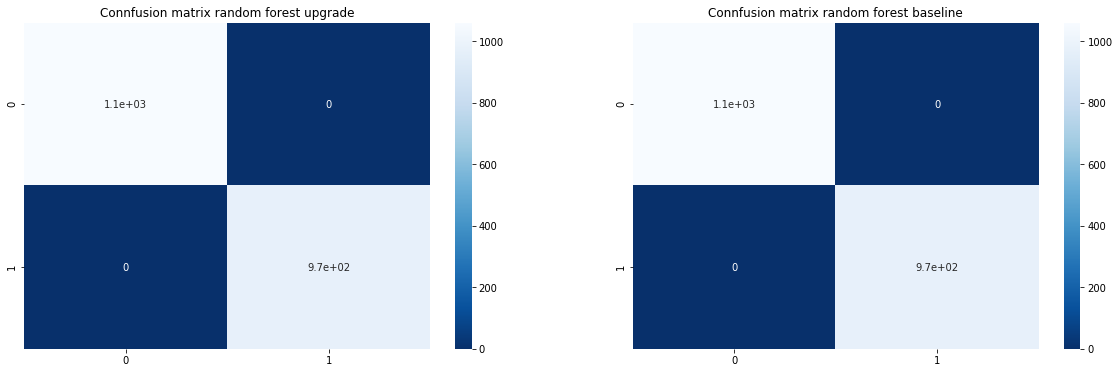

In [45]:
plt.figure(figsize = (20, 6))
subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_pred_upgrade_xgb, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix random forest upgrade')

subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_pred_default, test_y), annot = True, cmap = 'Blues_r')
plt.title('Connfusion matrix random forest baseline')

plt.show()
# 1 - poisonous, 0 - edible

## Roc-curves different model

In [47]:
from sklearn.metrics import roc_curve

Roc-curves of upgrade models (blue line is roc-curve of model without mistakes)


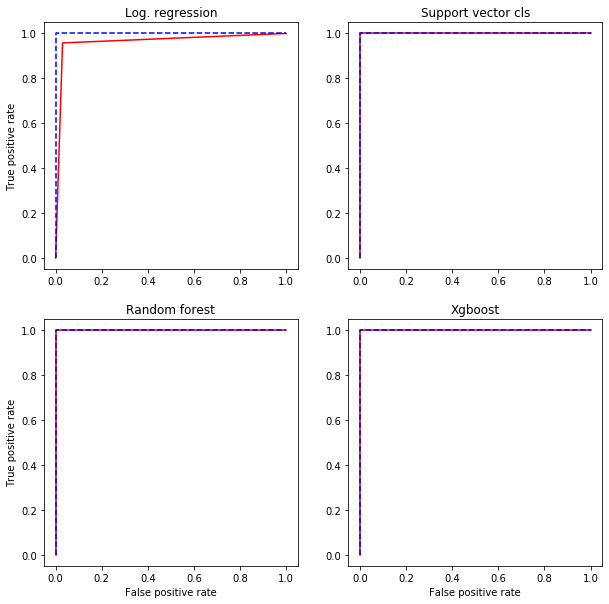

In [77]:
log1, log2, _ = roc_curve(test_y, y_pred_upgrade_log)
svc1, svc2, _ = roc_curve(test_y, y_pred_upgrade_svm)
for1, for2, _ = roc_curve(test_y, y_pred_upgrade_for)
xgb1, xgb2, _ = roc_curve(test_y, y_pred_upgrade_xgb)


fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0, 0].plot(log1, log2, color = 'red')
ax[0, 0].plot([0, 0, 1],[0, 1, 1], linestyle = '--', color = 'blue')
ax[0, 0].set_ylabel('True positive rate')
ax[0, 0].set_title('Log. regression')

ax[0, 1].plot(svc1, svc2, color = 'red')
ax[0, 1].plot([0, 0, 1],[0, 1, 1], linestyle = '--', color = 'blue')

ax[0, 1].set_title('Support vector cls')

ax[1, 0].plot(for1, for2, color = 'red')
ax[1, 0].plot([0, 0, 1],[0, 1, 1], linestyle = '--', color = 'blue')
ax[1, 0].set_xlabel('False positive rate')
ax[1, 0].set_ylabel('True positive rate')
ax[1, 0].set_title('Random forest')

ax[1, 1].plot(xgb1, xgb2, color = 'red')
ax[1, 1].plot([0, 0, 1],[0, 1, 1], linestyle = '--', color = 'blue')
ax[1, 1].set_xlabel('False positive rate')
ax[1, 1].set_title('Xgboost')

print('Roc-curves of upgrade models (blue line is roc-curve of model without mistakes)')

## Results

Три из четырех адгоритмов при подборе параметров не допустили ошибок на тестовой выборке. Причем два из 4 алгоритмов даже с параметрами по умолчанию не допустили ошибок.Нелинейные модели на этих данных работают лучше линейных. Однако мы не можем сказать, что эти модели идеальны, так как существует вероятьность того, что они переобучились<br>
* Random forest and XGBClassifier имеют 100% точность как при подборе параметров, так и без него
* SVC только при подборе параметров достигает точности 100%
* Logistic regression не достигает точности 100% даже с подбором параметров